In [45]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
df=pd.read_csv('laptops.csv')

In [3]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


### Prepare data

In [29]:
df.columns=df.columns.str.lower().str.replace(' ','_')
df.head(1)

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.0


In [32]:
# get all columns with strings contents
string_columns= list(df.dtypes [df.dtypes=='object'].index)
string_columns

['laptop', 'status', 'brand', 'model', 'cpu', 'storage_type', 'gpu', 'touch']

In [33]:
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [35]:
# checking the result
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,asus_expertbook_b1_b1502cba-ej0436x_intel_core...,new,asus,expertbook,intel_core_i5,8,512,ssd,NaN,15.6,no,1009.00
1,alurin_go_start_intel_celeron_n4020/8gb/256gb_...,new,alurin,go,intel_celeron,8,256,ssd,NaN,15.6,no,299.00
2,asus_expertbook_b1_b1502cba-ej0424x_intel_core...,new,asus,expertbook,intel_core_i3,8,256,ssd,NaN,15.6,no,789.00
3,msi_katana_gf66_12uc-082xes_intel_core_i7-1270...,new,msi,katana,intel_core_i7,16,1000,ssd,rtx_3050,15.6,no,1199.00
4,hp_15s-fq5085ns_intel_core_i5-1235u/16gb/512gb...,new,hp,15s,intel_core_i5,16,512,ssd,NaN,15.6,no,669.01


In [36]:
# slicing to only have Next, use only the following columns:
'''

'ram',
'storage',
'screen',
'final_price'

'''

"\n\n'ram',\n'storage',\n'screen',\n'final_price'\n\n"

In [41]:
# slicing the target columns
df=df[['ram','storage','screen','final_price']]

### Explotory data analysis

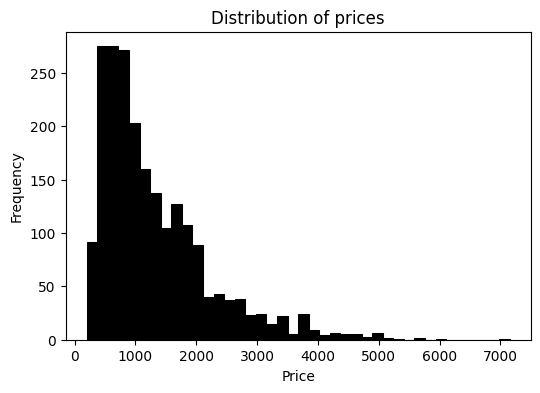

In [44]:
plt.figure(figsize=(6, 4))

sns.histplot(df.final_price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

In [53]:
# dealing with outliers
data=[1,10,100,1000]
datalog=np.log(data)

In [60]:
# using np.log1p add one unit to every number in list and compute natural log
np.log1p(data)

array([0.69314718, 2.39789527, 4.61512052, 6.90875478])

In [61]:
# find exponent number which were produced by np.log1p
np.expm1(np.log1p(data))

array([   1.,   10.,  100., 1000.])

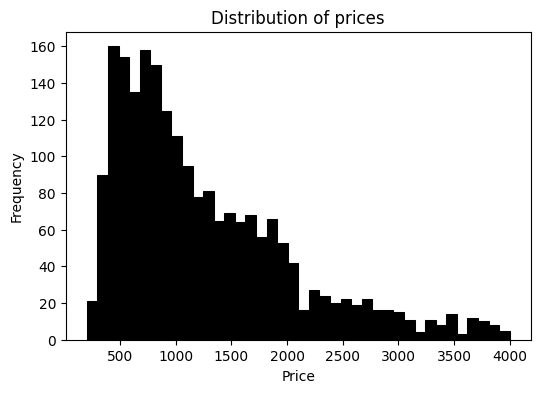

In [66]:
plt.figure(figsize=(6, 4))

sns.histplot(df.final_price[df.final_price < 4000], bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

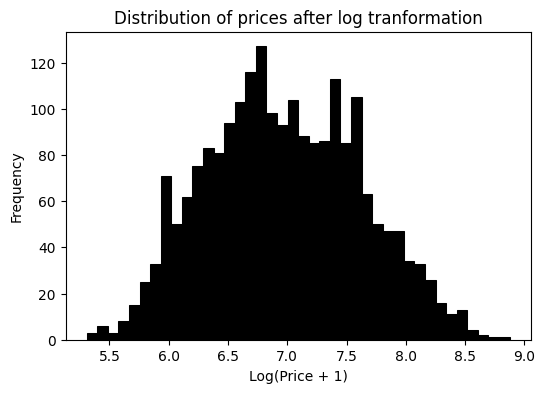

In [87]:
log_price = np.log1p(df.final_price)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()  # this looks much better

In [69]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [70]:
# Q1  Question 1
#There's one column with missing values. What is it?

In [71]:
# screen

In [88]:
# Question 2
# What's the median (50% percentile) for variable 'ram'?

In [90]:
df.ram.mean()  # 15.41

15.41388888888889

### Validation framework

In [72]:
np.random.seed(2)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [75]:
n_train, n_val, n_test, n

(1296, 432, 432, 2160)

In [86]:
y_train_orig = df_train.final_price.values
y_val_orig = df_val.final_price.values
y_test_orig = df_test.final_price.values

y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']